In [1]:
pip install dmba

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from dmba import classificationSummary
from sklearn.metrics import accuracy_score

Colab environment detected.


In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes_df.shape)

(768, 9)


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
diabetes_df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
diabetes_df.isnull().any().any()

np.False_

In [8]:
#Splitting Training and test set using 75/25 rule.

y = diabetes_df['Outcome']

X = diabetes_df.drop(columns=['Outcome'])

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
#Scale training set

X_train_scaled = scaler.fit_transform(train_X)
X_train_scaled = pd.DataFrame(X_train_scaled)

In [11]:
#Scale test set

X_test_scaled = scaler.transform(test_X)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
#Running KNN Model

knn.fit(X_train_scaled, train_y)

KNeighborsClassifier(n_neighbors=3)

In [14]:
classificationSummary(test_y, knn.predict(X_test_scaled))

Confusion Matrix (Accuracy 0.6979)

       Prediction
Actual  0  1
     0 98 25
     1 33 36


In [15]:
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(test_y, knn.predict(X_test_scaled))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.630208
1    2  0.656250
2    3  0.697917
3    4  0.697917
4    5  0.682292
5    6  0.687500
6    7  0.697917
7    8  0.677083
8    9  0.677083
9   10  0.671875
10  11  0.687500
11  12  0.703125
12  13  0.677083
13  14  0.708333


In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
classes = sorted(y.unique())
print(classes)

[np.int64(0), np.int64(1)]


In [18]:
#Running Neural Network Model

clf = MLPClassifier(hidden_layer_sizes=[1], activation='logistic',  random_state=1)
clf.fit(X_train_scaled, train_y)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=[1], random_state=1)

In [19]:
classificationSummary(test_y, clf.predict(X_test_scaled), class_names=classes)

Confusion Matrix (Accuracy 0.6406)

       Prediction
Actual   0   1
     0 123   0
     1  69   0


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary

In [21]:
#Running Logistic Regression Model

logit_reg = LogisticRegression()
logit_reg.fit(X_train_scaled, train_y)

LogisticRegression()

In [22]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -0.9010007672603908
       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin      BMI  \
coeff     0.201701  1.131155       -0.22239       0.066148 -0.172464  0.76005   

       DiabetesPedigreeFunction      Age  
coeff                   0.17181  0.42994  


In [23]:
classificationSummary(train_y, logit_reg.predict(X_train_scaled))

Confusion Matrix (Accuracy 0.7795)

       Prediction
Actual   0   1
     0 336  41
     1  86 113


In [24]:
classificationSummary(test_y, logit_reg.predict(X_test_scaled))

Confusion Matrix (Accuracy 0.7292)

       Prediction
Actual  0  1
     0 95 28
     1 24 45


In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [26]:
#Running Decision Tree Model with Max Depth of 3

classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(X_train_scaled, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

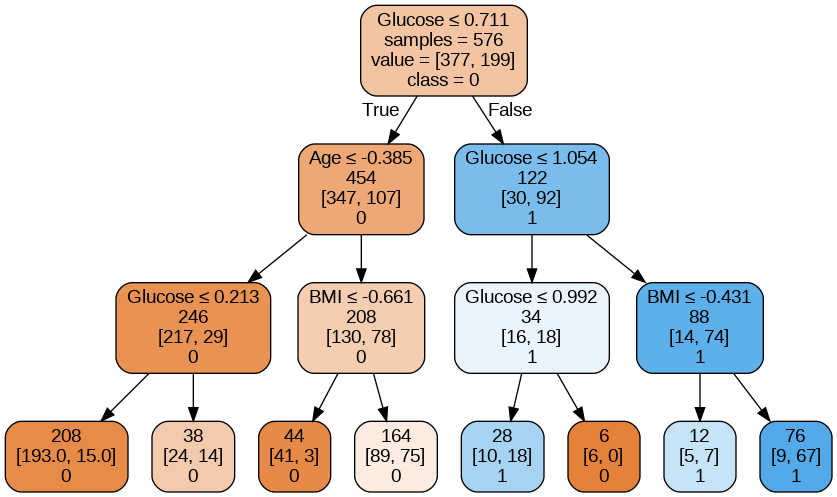

In [27]:
plotDecisionTree(classTree, feature_names=diabetes_df.columns[:8], class_names=classTree.classes_)

In [28]:
classificationSummary(train_y, classTree.predict(X_train_scaled))

Confusion Matrix (Accuracy 0.7726)

       Prediction
Actual   0   1
     0 353  24
     1 107  92


In [29]:
classificationSummary(test_y, classTree.predict(X_test_scaled))

Confusion Matrix (Accuracy 0.7135)

       Prediction
Actual   0   1
     0 104  19
     1  36  33


In [30]:
#Running Random Forest Model

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train_scaled, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [31]:
classificationSummary(train_y, rf.predict(X_train_scaled))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 377   0
     1   0 199


In [32]:
classificationSummary(test_y, rf.predict(X_test_scaled))

Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual  0  1
     0 99 24
     1 24 45
